In [103]:
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas

%matplotlib inline

In [104]:
from numpy.random import seed
seed(1)

from tensorflow import random
random.set_seed(2)

In [105]:
df = pd.read_csv('btc_close_volatility_volume_final.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)


In [106]:
df.head()

,Unnamed: 0,close,volumefrom,volumeto,OBV,30day_volatility,7Day_Volatility
Date,,,,,,,
2010-08-14,0,0.06529,4462.87,294.95,-82.54,0.008722,31.86
2010-08-15,1,0.06550,10731.47,696.80,10648.93,0.008284,32.19
2010-08-16,2,0.07000,13185.74,915.00,23834.67,0.007328,35.91
2010-08-17,3,0.06800,2953.98,203.83,20880.69,0.006658,34.80
2010-08-18,4,0.06670,741.12,50.04,20139.57,0.006347,25.64


In [107]:
list(df.columns)

['Unnamed: 0',
 'close',
 'volumefrom',
 'volumeto',
 'OBV',
 '30day_volatility',
 '7Day_Volatility']

In [108]:
df = df.drop(columns=['Unnamed: 0'])

In [109]:
df.head()

,close,volumefrom,volumeto,OBV,30day_volatility,7Day_Volatility
Date,,,,,,
2010-08-14,0.06529,4462.87,294.95,-82.54,0.008722,31.86
2010-08-15,0.06550,10731.47,696.80,10648.93,0.008284,32.19
2010-08-16,0.07000,13185.74,915.00,23834.67,0.007328,35.91
2010-08-17,0.06800,2953.98,203.83,20880.69,0.006658,34.80
2010-08-18,0.06670,741.12,50.04,20139.57,0.006347,25.64


In [110]:
df.tail()
#df.dtypes

,close,volumefrom,volumeto,OBV,30day_volatility,7Day_Volatility
Date,,,,,,
2020-04-06,7201.57,70648.16,5.164228e+08,12168426.35,823.516068,24.48
2020-04-07,7367.37,60952.77,4.453300e+08,12229379.12,791.988356,24.54
2020-04-08,7294.55,44071.93,3.212877e+08,12185307.19,758.946242,24.62
2020-04-09,6876.49,63355.47,4.401324e+08,12121951.72,704.424005,31.07
2020-04-10,6887.60,24917.32,1.713528e+08,12146869.04,660.467585,30.75


In [111]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [127]:
window_size = 20

feature_column = 4
target_column = 4
X, y = window_data(df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[0.00872161 0.00828379 0.00732787 0.00665765 0.00634701 0.00561312
  0.005138   0.00515793 0.00487759 0.00417942 0.00387331 0.00377685
  0.00361212 0.00349095 0.00347262 0.00342473 0.00347018 0.00337491
  0.00326488 0.00301053]
 [0.00828379 0.00732787 0.00665765 0.00634701 0.00561312 0.005138
  0.00515793 0.00487759 0.00417942 0.00387331 0.00377685 0.00361212
  0.00349095 0.00347262 0.00342473 0.00347018 0.00337491 0.00326488
  0.00301053 0.00295737]
 [0.00732787 0.00665765 0.00634701 0.00561312 0.005138   0.00515793
  0.00487759 0.00417942 0.00387331 0.00377685 0.00361212 0.00349095
  0.00347262 0.00342473 0.00347018 0.00337491 0.00326488 0.00301053
  0.00295737 0.00298244]
 [0.00665765 0.00634701 0.00561312 0.005138   0.00515793 0.00487759
  0.00417942 0.00387331 0.00377685 0.00361212 0.00349095 0.00347262
  0.00342473 0.00347018 0.00337491 0.00326488 0.00301053 0.00295737
  0.00298244 0.00283553]
 [0.00634701 0.00561312 0.005138   0.00515793 0.00487759 0.00417942
 

In [128]:
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [130]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[2.02010297e-06]
  [1.90839399e-06]
  [1.66449237e-06]
  [1.49348539e-06]
  [1.41422565e-06]
  [1.22697474e-06]
  [1.10574748e-06]
  [1.11083287e-06]
  [1.03930402e-06]
  [8.61166356e-07]
  [7.83062877e-07]
  [7.58451281e-07]
  [7.16420157e-07]
  [6.85504142e-07]
  [6.80828468e-07]
  [6.68609674e-07]
  [6.80205726e-07]
  [6.55897611e-07]
  [6.27823789e-07]
  [5.62926368e-07]]

 [[1.90839399e-06]
  [1.66449237e-06]
  [1.49348539e-06]
  [1.41422565e-06]
  [1.22697474e-06]
  [1.10574748e-06]
  [1.11083287e-06]
  [1.03930402e-06]
  [8.61166356e-07]
  [7.83062877e-07]
  [7.58451281e-07]
  [7.16420157e-07]
  [6.85504142e-07]
  [6.80828468e-07]
  [6.68609674e-07]
  [6.80205726e-07]
  [6.55897611e-07]
  [6.27823789e-07]
  [5.62926368e-07]
  [5.49361799e-07]]

 [[1.66449237e-06]
  [1.49348539e-06]
  [1.41422565e-06]
  [1.22697474e-06]
  [1.10574748e-06]
  [1.11083287e-06]
  [1.03930402e-06]
  [8.61166356e-07]
  [7.83062877e-07]
  [7.58451281e-07]
  [7.16420157e-07]
  [6

In [131]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [132]:
model = Sequential()

number_units = 20
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [133]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

In [134]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 20, 20)            1760      
_________________________________________________________________
dropout_18 (Dropout)         (None, 20, 20)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 20, 20)            3280      
_________________________________________________________________
dropout_19 (Dropout)         (None, 20, 20)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [135]:
model.fit(X_train, y_train, epochs=40, shuffle=False, batch_size=20, verbose=1)

Train on 2416 samples
Epoch 1/40
2416/2416 [==============================] - 5s 2ms/sample - loss: 2.0157e-04 - accuracy: 4.1391e-04
Epoch 2/40
2416/2416 [==============================] - 2s 812us/sample - loss: 2.3887e-04 - accuracy: 4.1391e-04
Epoch 3/40
2416/2416 [==============================] - 2s 812us/sample - loss: 2.1762e-04 - accuracy: 4.1391e-04
Epoch 4/40
2416/2416 [==============================] - 2s 811us/sample - loss: 2.1242e-04 - accuracy: 4.1391e-04
Epoch 5/40
2416/2416 [==============================] - 2s 840us/sample - loss: 2.0340e-04 - accuracy: 4.1391e-04
Epoch 6/40
2416/2416 [==============================] - 2s 835us/sample - loss: 1.9575e-04 - accuracy: 4.1391e-04
Epoch 7/40
2416/2416 [==============================] - 2s 836us/sample - loss: 1.8377e-04 - accuracy: 4.1391e-04
Epoch 8/40
2416/2416 [==============================] - 2s 830us/sample - loss: 1.6900e-04 - accuracy: 4.1391e-04
Epoch 9/40
2416/2416 [==============================] - 2s 836us/sam

In [136]:
model.evaluate(X_test, y_test,verbose=0)

[0.000724775848345312, 0.00096432015]

In [137]:
predicted = model.predict(X_test)

In [138]:

predicted_volatility = scaler.inverse_transform(predicted)
real_volatility = scaler.inverse_transform(y_test.reshape(-1, 1))

In [139]:
btc = pd.DataFrame({
    "Real Volatility": real_volatility.ravel(),
    "Predicted Volatility": predicted_volatility.ravel()
})

In [140]:
btc.tail(10)

,Real Volatility,Predicted Volatility
1027,1297.102524,1348.583130
1028,1240.274023,1356.784912
1029,1176.177901,1338.844238
1030,1082.630914,1294.014038
1031,965.245984,1219.130249
1032,866.477817,1115.213379
1033,823.516068,992.180786
1034,791.988356,875.085144
1035,758.946242,782.845825
1036,704.424005,724.927917


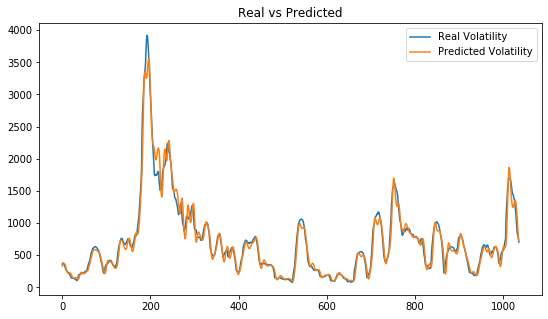

In [141]:
btc.plot(title="Real vs Predicted", figsize=(9,5))